In [1]:
# If the below code doesn't work uncomment this and run (this adds the parent directory to the path)
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np

In [3]:
dl = DataLib("SignalData")

##  Data Exploration Prompts

### 1) Look at bond yields across countries and determine country with highest and lowest returns

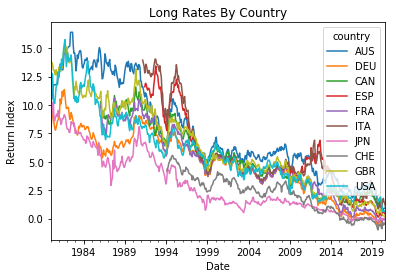

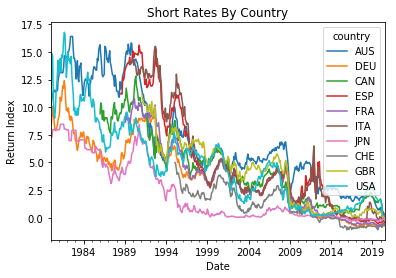

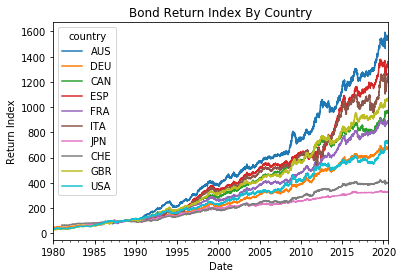

In [120]:
LongRates = dl.pull('LongRates')
ShortRates = dl.pull('ShortRates')

LongRates.plot()
plt.xlabel('Date')
plt.ylabel('Return Index')
plt.title('Long Rates By Country')
plt.show()

ShortRates.plot()
plt.xlabel('Date')
plt.ylabel('Return Index')
plt.title('Short Rates By Country')
plt.show()

BondReturnIndex = dl.pull('BondRetIdx/LocalFX')
BondReturnIndex.plot()
plt.xlabel('Date')
plt.ylabel('Return Index')
plt.title('Bond Return Index By Country')
plt.show()

In [34]:
print("Highest returns is " + BondReturnIndex.iloc[-1:, :].idxmax(axis=1)[0])
print("Lowest returns is " + BondReturnIndex.iloc[-1:, :].idxmin(axis=1)[0])

Highest returns is AUS
Lowest returns is JPN


In [49]:
threeYearsNumDays = 1

# Method 1 (.rolling and .apply)
BondReturnIndexThreeYearRolling = BondReturnIndex.rolling(threeYearsNumDays + 2, min_periods=threeYearsNumDays + 2)
BondReturnIndexThreeYearRollingReturns = BondReturnIndexThreeYearRolling.apply(lambda x: (x[-1]-x[0])/x[0])
print(BondReturnIndexThreeYearRollingReturns.tail())

# Method 2 (pct_change)
print(BondReturnIndex.pct_change(periods=threeYearsNumDays).tail())

country          AUS       DEU       CAN       ESP       FRA       ITA  \
date                                                                     
2020-07-28 -0.004860  0.005970  0.002893  0.000164  0.004849 -0.000988   
2020-07-29  0.002270  0.000664  0.013722 -0.001048 -0.000677 -0.000968   
2020-07-30  0.005636  0.003322  0.001937  0.003939  0.001975  0.004341   
2020-07-31  0.004013  0.003012  0.000870  0.001167  0.000747 -0.001715   
2020-08-03 -0.000211 -0.002026 -0.001809 -0.002178 -0.001706 -0.003806   

country          JPN       CHE       GBR       USA  
date                                                
2020-07-28 -0.000600  0.006301  0.002641  0.000810  
2020-07-29  0.000098 -0.000067 -0.001414  0.002682  
2020-07-30  0.000107  0.000849  0.000970  0.003762  
2020-07-31  0.000392  0.002846  0.001018  0.004264  
2020-08-03 -0.000500 -0.001601 -0.001283 -0.001945  
country          AUS       DEU       CAN       ESP       FRA       ITA  \
date                                

/Users/andzuck/.local/share/virtualenvs/Intership2020-Iv1jtUG8/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """


### 2) Look at rolling 3-year returns. Pick window when country strongly outperformes the rest of the world and case where one underperforms. What was going on in the market at these times?

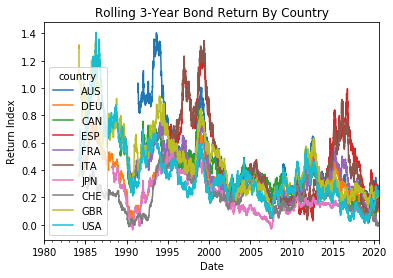

In [54]:
threeYearsNumDays = 365 * 3

# Method 1 (.rolling and .apply)
BondReturnIndexThreeYearRolling = BondReturnIndex.rolling(threeYearsNumDays + 1) # add 1 so that window includes n + 1 days for computation
BondReturnIndexThreeYearRollingReturns = BondReturnIndexThreeYearRolling.apply(lambda x: (x[-1]-x[0])/x[0], raw=True)
# print(BondReturnIndexThreeYearRollingReturns.tail())

# Method 2 (pct_change)
# print(BondReturnIndex.pct_change(periods=threeYearsNumDays).tail())

BondReturnIndexThreeYearRollingReturns.plot()
plt.xlabel('Date')
plt.ylabel('Return Index')
plt.title('Rolling 3-Year Bond Return By Country')
plt.show()

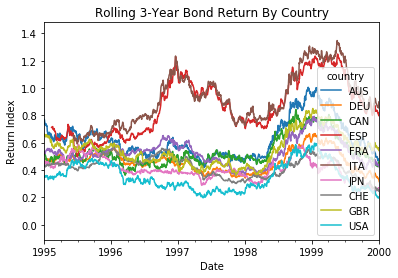

In [71]:
# Strongly outperforms window (1995 - 2005)
BondReturnIndexThreeYearRollingReturns.plot()
plt.xlabel('Date')
plt.ylabel('Return Index')
plt.xlim('1995-01-01', '2000-01-01')
plt.title('Rolling 3-Year Bond Return By Country')
plt.show()

# Spain and Italy have high outsized 3-year rolling bond returns from late 1996 to 1989

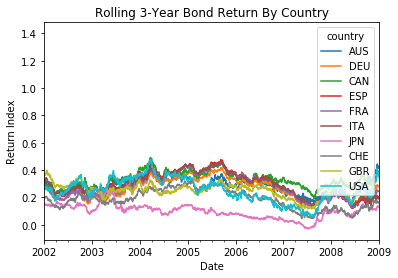

In [65]:
# Strongly underperforms window (2002 - 2009)
BondReturnIndexThreeYearRollingReturns.plot()
plt.xlabel('Date')
plt.ylabel('Return Index')
plt.xlim('2002-01-01', '2009-01-01')
plt.title('Rolling 3-Year Bond Return By Country')
plt.show()

# Japan underperforms 3-year rolling bond returns from 2004-2007

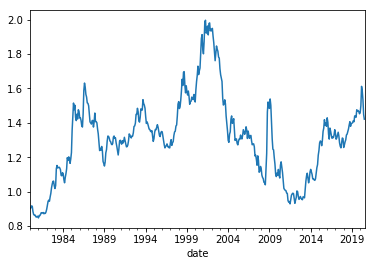

In [169]:
FxVsUSD['AUS'].plot()
plt.show()

country       AUS       DEU       CAN       ESP       FRA       ITA       JPN  \
date                                                                            
2020-04  0.983751  1.018554  1.007525  1.018551  1.018553  1.018552  1.000205   
2020-05  0.967911  0.996335  0.993740  0.996336  0.996324  0.996335  0.995714   
2020-06  0.944050  0.968673  0.969936  0.968658  0.968672  0.968658  1.003153   
2020-07  0.980613  0.981816  1.000000  0.981786  0.981779  0.981785  0.991921   
2020-08  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

country       CHE       GBR       USA  
date                                   
2020-04  1.014629  1.003720  0.992556  
2020-05  0.999691  0.991136  1.015822  
2020-06  0.979808  1.018374  1.011704  
2020-07  0.982652  1.013173  1.035419  
2020-08  1.000000  1.000000  1.000000  


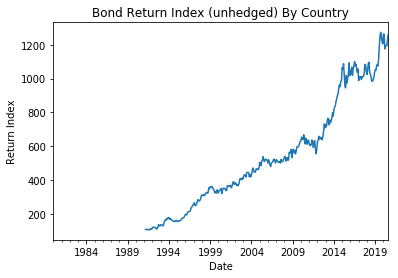

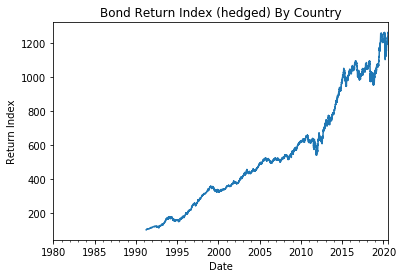

In [196]:
FxVsUSD = dl.pull('fxVsUSD')
FxVsUSDChanges = FxVsUSD.pct_change() + 1
BondReturnIndex_Downsampled = BondReturnIndex.resample('M').last()
BondReturnIndex_Downsampled.tail()
print(FxVsUSDChanges.tail())
BondReturnIndexUnhedged = BondReturnIndex_Downsampled.mul(FxVsUSDChanges)
BondReturnIndexUnhedged['ITA'].plot()
plt.xlabel('Date')
plt.ylabel('Return Index')
plt.title('Bond Return Index (unhedged) By Country')
plt.show()

BondReturnIndex['ITA'].plot()
plt.xlabel('Date')
plt.ylabel('Return Index')
plt.title('Bond Return Index (hedged) By Country')
plt.show()



In [52]:
BondReturnIndex.iloc[5000,:]

country
AUS    396.919
DEU    226.986
CAN    292.181
ESP    363.082
FRA    277.946
ITA    346.096
JPN    192.050
CHE    196.484
GBR    322.690
USA    237.838
Name: 1999-03-02, dtype: float64